# Konvolutivne neuronske mreze

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [12]:
input_shape = train_images[0].shape
input_shape

(32, 32, 3)

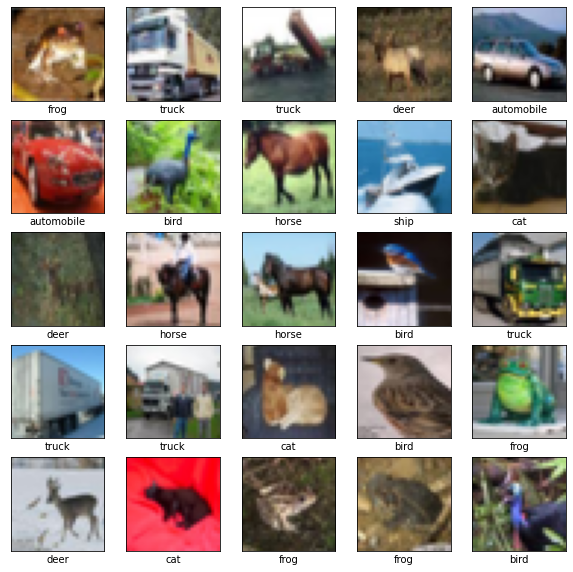

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Feature learning model

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## Clasification model

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [21]:
epochs = 10
batch_size = 64
num_classes = 10

train_labels_cat = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, num_classes)

print(train_labels_cat.shape)
print(test_labels_cat.shape)


(50000, 10)
(10000, 10)


In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy']
)
history = model.fit(
    train_images, train_labels_cat,
    epochs=epochs, batch_size=batch_size,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
782/782 [==============================] - 58s 74ms/step - loss: 0.0575 - accuracy: 0.5588 - val_loss: 27.6428 - val_accuracy: 0.0659
Epoch 2/10
782/782 [==============================] - 62s 79ms/step - loss: 0.0525 - accuracy: 0.6071 - val_loss: 27.6531 - val_accuracy: 0.1173
Epoch 3/10
782/782 [==============================] - 62s 79ms/step - loss: 0.0491 - accuracy: 0.6343 - val_loss: 27.6533 - val_accuracy: 0.1191
Epoch 4/10
782/782 [==============================] - 69s 89ms/step - loss: 0.0465 - accuracy: 0.6589 - val_loss: 27.6587 - val_accuracy: 0.1148
Epoch 5/10
782/782 [==============================] - 63s 81ms/step - loss: 0.0445 - accuracy: 0.6750 - val_loss: 27.6599 - val_accuracy: 0.0822
Epoch 6/10
782/782 [==============================] - 62s 79ms/step - loss: 0.0426 - accuracy: 0.6902 - val_loss: 27.6632 - val_accuracy: 0.1119
Epoch 7/10
782/782 [==============================] - 65s 84ms/step - loss: 0.0410 - accuracy: 0.7043 - val_loss: 27.6605 - val_ac

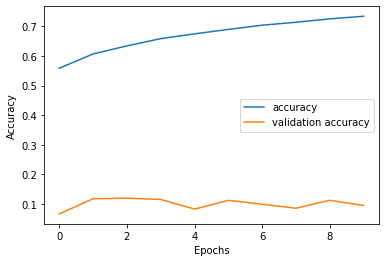

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [33]:
! mkdir model
! ls

CNN.ipynb  model  Untitled.ipynb


In [35]:
model_path = 'model/basic_network.h5'
model.save(model_path)

In [36]:
! ls model

basic_network.h5


In [39]:
model = None

In [40]:
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)

313/313 [==============================] - 4s 13ms/step - loss: 0.0470 - accuracy: 0.6628


In [42]:
print(test_loss)
print(test_acc)

0.04701562970876694
0.6628000140190125
